In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler

In [2]:
import os
os.chdir(r'C:\Users\Komal\Downloads\Datasets')
df=pd.read_csv('covid_19_india.csv',parse_dates=['Date'],index_col='Date')
df.head()

,Sno,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Date,,,,,,,,
2020-01-30,1.0,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2020-01-31,2.0,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2020-02-01,3.0,6:00 PM,Kerala,2,0,0.0,0.0,2.0
2020-02-02,4.0,6:00 PM,Kerala,3,0,0.0,0.0,3.0
2020-02-03,5.0,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [3]:
df.index

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08',
               ...
               '2021-04-26', '2021-04-26', '2021-04-26', '2021-04-26',
               '2021-04-26',        'NaT',        'NaT',        'NaT',
                      'NaT',        'NaT'],
              dtype='datetime64[ns]', name='Date', length=14263, freq=None)

In [5]:
df.shape

(14263, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14263 entries, 2020-01-30 to NaT
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sno                       14258 non-null  float64
 1   Time                      14258 non-null  object 
 2   State/UnionTerritory      14258 non-null  object 
 3   ConfirmedIndianNational   14258 non-null  object 
 4   ConfirmedForeignNational  14258 non-null  object 
 5   Cured                     14258 non-null  float64
 6   Deaths                    14258 non-null  float64
 7   Confirmed                 14258 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1002.9+ KB


In [7]:
df.describe()

,Sno,Cured,Deaths,Confirmed
count,14258.000000,1.425800e+04,14258.000000,1.425800e+04
mean,7129.500000,1.558098e+05,2493.646865,1.704529e+05
std,4116.074404,3.147152e+05,6654.411851,3.444210e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,3565.250000,1.273250e+03,10.000000,2.405500e+03
50%,7129.500000,1.678300e+04,324.500000,2.138400e+04
75%,10693.750000,1.819845e+05,1919.000000,2.090688e+05
max,14258.000000,3.530060e+06,64760.000000,4.295027e+06


In [4]:
df.columns

Index(['Sno', 'Time', 'State/UnionTerritory', 'ConfirmedIndianNational',
       'ConfirmedForeignNational', 'Cured', 'Deaths', 'Confirmed'],
      dtype='object')

In [8]:
df.drop(['Sno','Time'],axis=1,inplace=True)

In [9]:
df.drop(['ConfirmedIndianNational','ConfirmedForeignNational'],axis=1,inplace=True)

In [10]:
df.head()

,State/UnionTerritory,Cured,Deaths,Confirmed
Date,,,,
2020-01-30,Kerala,0.0,0.0,1.0
2020-01-31,Kerala,0.0,0.0,1.0
2020-02-01,Kerala,0.0,0.0,2.0
2020-02-02,Kerala,0.0,0.0,3.0
2020-02-03,Kerala,0.0,0.0,3.0


<AxesSubplot:xlabel='Date'>

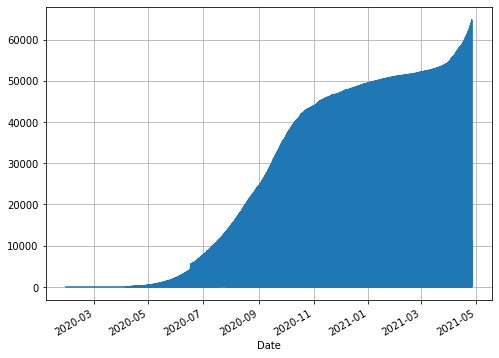

In [11]:
a=df['Deaths']
a.plot(figsize=(8,6),grid=True)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

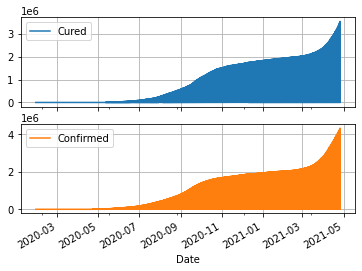

In [13]:
df[['Cured','Confirmed']].plot(subplots=True,grid=True)

In [14]:
data=df.groupby('State/UnionTerritory').sum()

In [15]:
data

,Cured,Deaths,Confirmed
State/UnionTerritory,,,
Andaman and Nicobar Islands,1111474.0,14991.0,1178472.0
Andhra Pradesh,197804937.0,1707018.0,208691274.0
Arunachal Pradesh,3386778.0,10986.0,3635358.0
Assam,48463777.0,234992.0,51802406.0
Bihar,57247252.0,331985.0,60675812.0
Cases being reassigned to states,0.0,0.0,345565.0
Chandigarh,4196706.0,68938.0,4611021.0
Chhattisgarh,55246657.0,715458.0,61989356.0
Dadra and Nagar Haveli and Daman and Diu,831176.0,594.0,885106.0


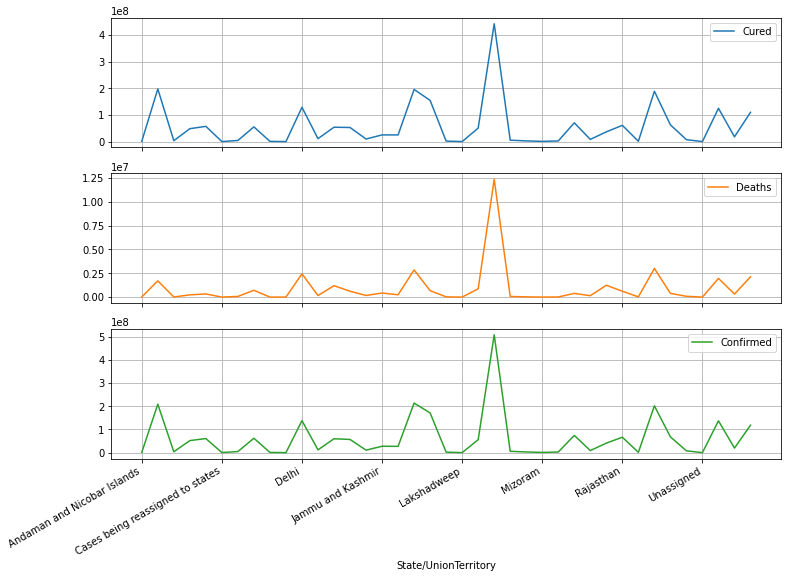

In [18]:
data[['Cured','Deaths','Confirmed']].plot(subplots=True,figsize=(12,9),grid=True);

In [23]:
data.max()

Cured        442749568.0
Deaths        12360636.0
Confirmed    507527814.0
dtype: float64

In [24]:
train_size=int(len(data)*0.8)
test_size=len(data)-train_size

train,test=data.iloc[0:train_size],data.iloc[train_size:len(df)]

In [25]:
#data=np.array(data).reshape(-1,1)
sc=MinMaxScaler()
scaled_data=sc.fit_transform(train,test)

In [27]:
train_data=scaled_data[0:train_size]
x_train=[]
y_train=[]
for i in range(10,len(train_data)):
    x_train.append(train_data[i-10:i,0])
    y_train.append(train_data[i,0])

In [28]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape))

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [33]:
model=Sequential()

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam',loss='mean squared error')
model.fit(x_train,y_train,epochs=30,batch_size=50)